In [38]:
#Before using this I was using DIT commands from duivytools
#https://duivytools.readthedocs.io/en/latest/DIT_old.html#xvg
#Trouble for some reason with plotting the nvt run... hmm
#This notebook will take inspo from above :)

In [39]:
import glob
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
plt.style.use('dark_background')

In [40]:
def data(filename):
    x, y = np.loadtxt(filename, comments=["@","#"], unpack=True)

    return x, y 
#data('./minim_potential.xvg')
def find(filename, word):
    with open(filename, 'r') as fp:
    # read all lines in a list
        lines = fp.readlines()
        for line in lines:
            # check if string present on a current line
            if line.find(word) != -1:
                #print(word, 'string found')
                #print('Line Number:', lines.index(line))
                #print('Line:', line)
                return line

#print(find('./minim_potential.xvg','xaxis'))
def label(filename, word):
    """
    The labels we are searching for are:
    xaxis
    yaxis
    s0
    """
    out=find(filename, word)
    out1=out.split('\"')    
    #print(out)
    #print(out1)
    return out1[-2]


#print(label("./minim_potential.xvg","s0"))
def plotBasic(filename, show=True):
    print(filename)
    x,y=data(filename)
    xlabel=label(filename,"xaxis")
    ylabel=label(filename,"yaxis")
    legend=label(filename,"s0")
    plt.plot(x,y,label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    if show:
        plt.show()

./minim_potential.xvg


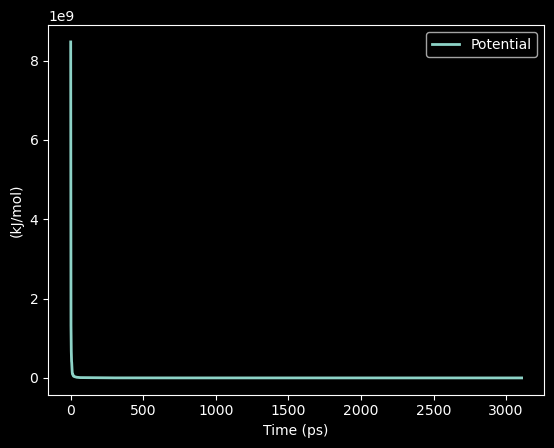

In [41]:
for file in ["./minim_potential.xvg"]:
    plotBasic(file)

./nvt_potential.xvg


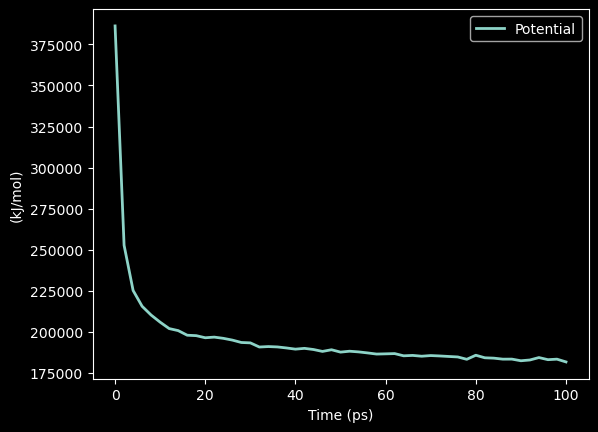

./nvt_totE.xvg


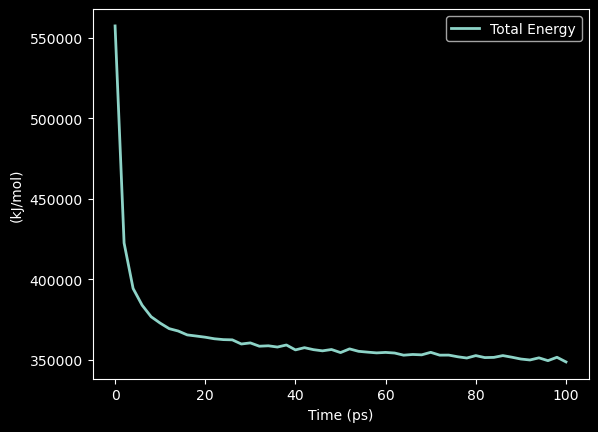

./nvt_temp.xvg


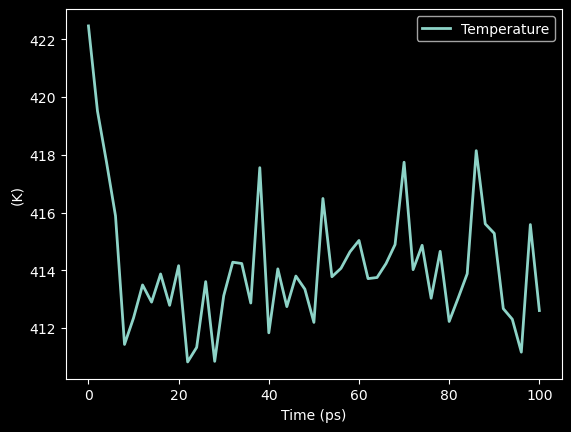

In [42]:
for file in ["./nvt_potential.xvg","./nvt_totE.xvg",
             "./nvt_temp.xvg"]:
    plotBasic(file)

In [43]:
#Might be a bit more analysis to do...
#Figuring out if we've actually reached our averages 
#But it looks ok to move on for now

./npt_temp.xvg


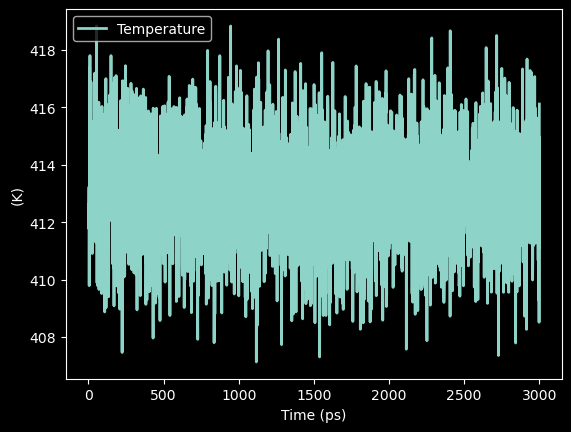

./npt_pres.xvg


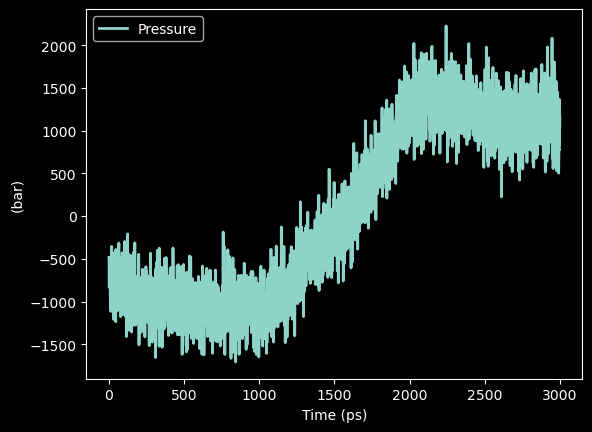

./npt_vol.xvg


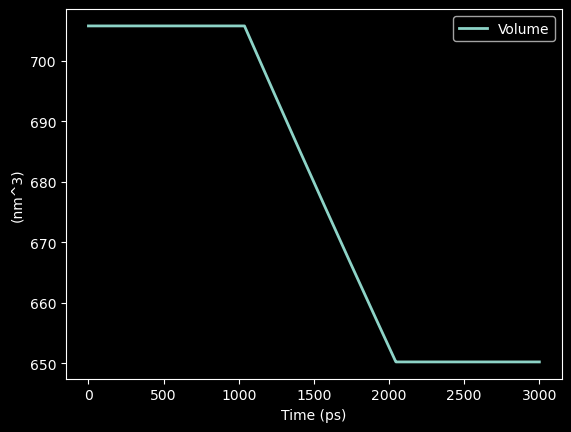

./npt_dens.xvg


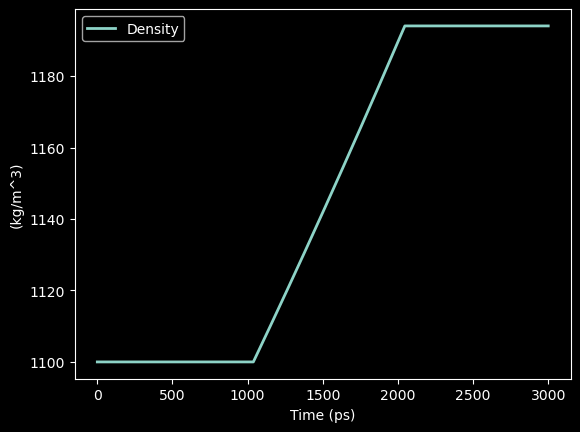

./npt_potential.xvg


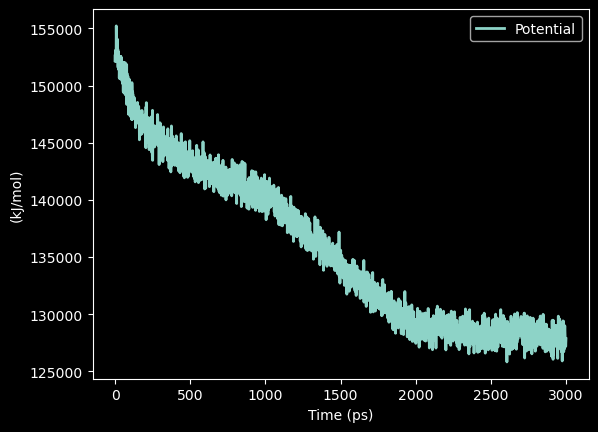

./npt_totE.xvg


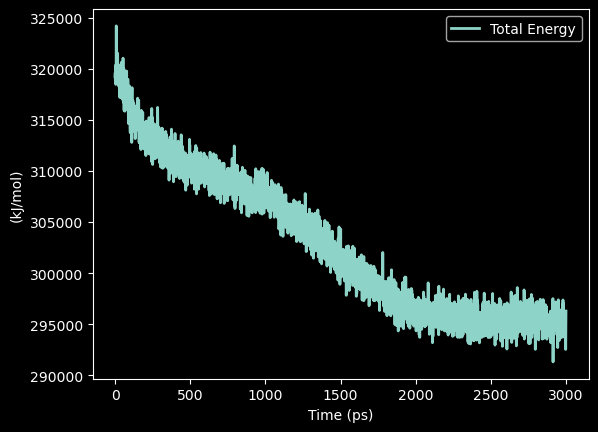

In [44]:
for plot in ["./npt_temp.xvg","./npt_pres.xvg","./npt_vol.xvg",
             "./npt_dens.xvg", "./npt_potential.xvg",
             "./npt_totE.xvg"]:
    try:
        plotBasic(plot)
    except:
        print("ah yes, the impatient one \n or silly hmm")
        break

In [45]:
#Looks nice so far. 
#We'll see when it finishes and then send off w/update:)

['./minim_potential.xvg', './nvt_potential.xvg', './npt_potential.xvg']
./minim_potential.xvg
./nvt_potential.xvg
./npt_potential.xvg


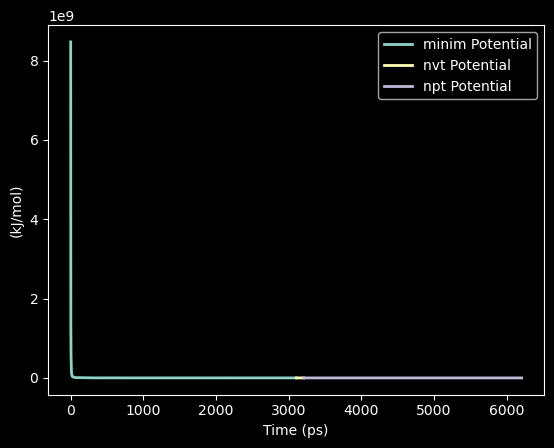

In [46]:
def filelist(datatype="potential",prefixes=["minim","nvt","npt"]):
    list=[]
    for pre in prefixes:
        list.append(f"./{pre}_{datatype}.xvg")
    return list
print(filelist())
def plot3(datatype="potential",prefixes=["minim","nvt","npt"]):
    """
    minimisation, nvt, npt data plot
    datatype follows my 4 letter abbreviations except for potential haha (so far xD -[sorry])
    """
    files=filelist(datatype=datatype,prefixes=prefixes)
    to_add=0.0
    for filename in files:
        print(filename)
        x,y    = data(filename)
        x     += to_add
        to_add = x[-1]
        xlabel = label(filename,"xaxis")
        ylabel = label(filename,"yaxis")
        legend = f"{filename.split('_')[0][2:]} {label(filename,'s0')}"
        plt.plot(x,y,label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
plot3()

./minim_potential.xvg
./nvt_potential.xvg
./npt_potential.xvg


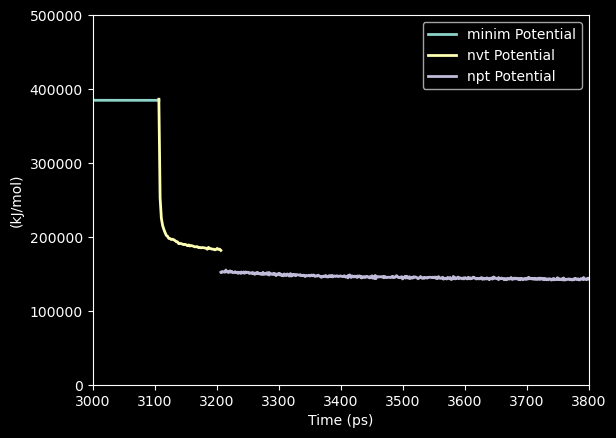

In [47]:
plot3("potential")
plt.ylim([0,500000])
plt.xlim([3000,3800])
plt.show()


In [48]:
#Not sure why there's such a drop off here...
#I'm not too worried - my starting coords are correct.
#.mdp error mayyyybe but my vmd looks good
#will check w gromacs pages :)

./nvt_temp.xvg
./npt_temp.xvg


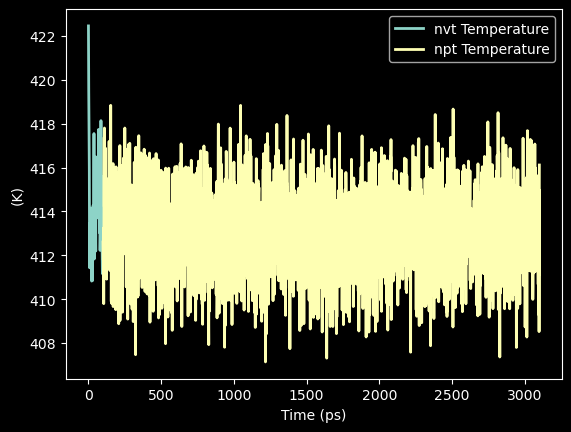

In [49]:
plot3(datatype="temp",prefixes=["nvt","npt"])

./minim_potential.xvg
./nvt_potential.xvg
./npt_potential.xvg


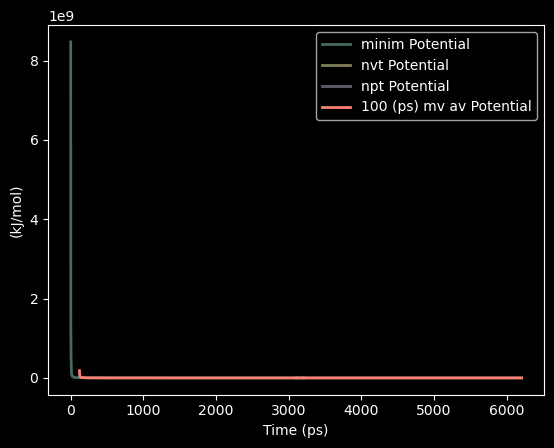

In [90]:
def moving_average(data, window_size):    
    """
    ty chatgpt
    returns moving averages for data
    """
    return np.convolve(data, 
                       np.ones(window_size)/window_size, 
                       mode='valid')
#data=np.linspace(0,100,100)
#moving_average(data,10)
def bigPlot(datatype="potential",prefixes=["minim","nvt","npt"],
            window_size=100):
    """
    minimisation, nvt, npt data plot
    datatype follows my 4 letter abbreviations except for potential haha (so far xD -[sorry])
    """
    files=filelist(datatype=datatype,prefixes=prefixes)
    to_add=0.0
    xs=np.array([])
    ys=np.array([])
    for filename in files:
        print(filename)
        x,y    = data(filename)
        x     += to_add
        to_add = x[-1]
        xlabel = label(filename,"xaxis")
        ylabel = label(filename,"yaxis")
        legend = f"{filename.split('_')[0][2:]} {label(filename,'s0')}"
        plt.plot(x,y,label=legend,alpha=0.5)
        
        xs=np.append(xs,x)
        ys=np.append(ys,y)
    #print(xs)
    #print(len(xs))
    if window_size != 0:
        xav=np.array(xs[window_size-1:])
        #print(len(xav))
        yav=moving_average(data=np.array(ys),window_size=window_size)
        #print(len(yav))
        xunit=xlabel.split(" ")[1]
        legend=f"{window_size} {xunit} mv av {label(filename,'s0')}"
        plt.plot(xav,yav,label=legend)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
bigPlot(datatype="potential",prefixes=["minim","nvt","npt"],
            window_size=100)

./nvt_temp.xvg
./npt_temp.xvg


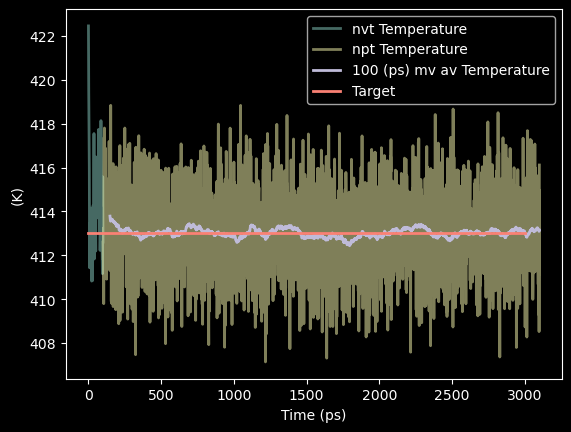

In [96]:
bigPlot(datatype="temp",prefixes=["nvt","npt"],
            window_size=100)
plt.plot(np.linspace(0,3000,2),np.ones(2)*413,label="Target")
plt.legend()
plt.show()

./nvt_totE.xvg
./npt_totE.xvg


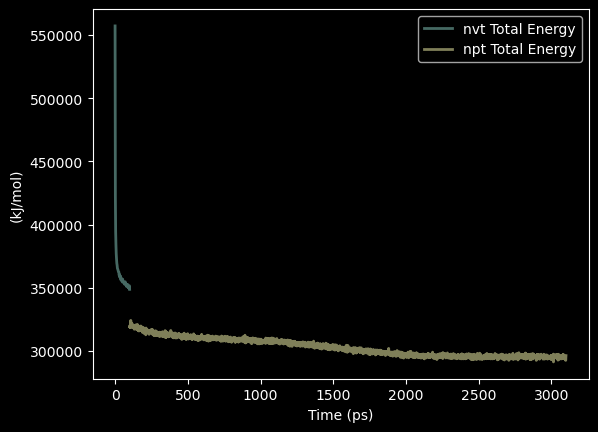

NOTE: there is a discontinuity... ¯\_(ツ)_/¯


In [97]:
bigPlot(datatype="totE",prefixes=["nvt","npt"],
            window_size=0)
plt.show()
print("NOTE: there is a discontinuity...",
      "¯\_(ツ)_/¯")

./npt_totE.xvg


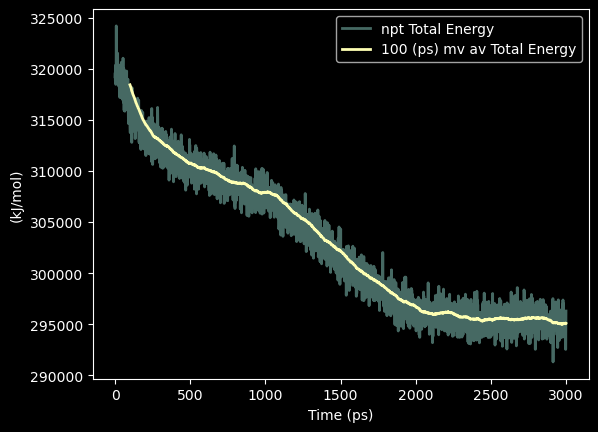

In [98]:
bigPlot(datatype="totE",prefixes=["npt"],
            window_size=100)